# Características de la Base de Datos: Encuesta ENIF 2024

## 1. Descripción General de la Base de Datos

La base de datos proviene de la **Encuesta Nacional de Inclusion Financiera (ENIF) 2024** realizada por el **INEGI**. En esta encuesta, se le hizo una serie de preguntas a **13,303 personas** sobre diversas características de su vivienda y situación económica. Algunas de las preguntas incluyeron el número de vehículos que poseen, si tienen acceso a internet, cuántas personas viven en la vivienda, entre otras.

### **Variable de Interés**
La variable de interés es el número de **personas por vivienda**, que es la variable que se busca predecir. Este dato está reflejado en la variable **`fac_viv`**, que representa la cantidad de personas que habitan cada vivienda en la muestra.

## 2. Descripción de las Variables

A continuación, se detallan las variables presentes en la base de datos con base en el diccionario proporcionado:

- **`llaveviv`**: 
  - **Descripción**: Llave de identificación de la vivienda.
  - **Tipo**: Categórica

- **`p0_1`**: 
  - **Descripción**: Número de cuartos para dormir en la vivienda.
  - **Tipo**: Numérica

- **`p0_2`**: 
  - **Descripción**: Número de recámaras en general en la vivienda.
  - **Tipo**: Numérica

- **`p0_3`**: 
  - **Descripción**: Número de baños completos en la vivienda.
  - **Tipo**: Numérica

- **`p0_4_1`**: 
  - **Descripción**: Si la vivienda tiene automóvil.
  - **Tipo**: Categórica (1: Sí, 2: No)

- **`p0_4_1A`**: 
  - **Descripción**: Cuantos automoviles hay en la vivienda.
  - **Tipo**: Numérica

- **`p0_4_2`**: 
  - **Descripción**: Si la vivienda tiene internet.
  - **Tipo**: Categórica (1: Sí, 2: No)

- **`p0_4_2A`**: 
  - **Descripción**: Si la vivienda tiene conexión fija o móil.
  - **Tipo**: Categórica (1: fija, 2: móvil)

- **`p1_1`**: 
  - **Descripción**: Año de construcción de la vivienda.
  - **Tipo**: Numérica

- **`p1_2`**: 
  - **Descripción**: Si las personas comparten el mismo gasto para comer
  - **Tipo**: Categórica (1: Sí, 2: No)

- **`p1_3`**: 
  - **Descripción**: Cuantos grupos de personas tienen gasto separado para comer
  - **Tipo**: Númerica

- **`folio`**: 
  - **Descripción**: Folio único de registro.
  - **Tipo**: Categórica

- **`viv_sel`**: 
  - **Descripción**: Selección de vivienda.
  - **Tipo**: Categórica

- **`ent`**: 
  - **Descripción**: Estado donde se encuentra la vivienda.
  - **Tipo**: Categórica

- **`tloc`**: 
  - **Descripción**: Tamaño de localidad.
  - **Tipo**: Categórica

- **`region`**: 
  - **Descripción**: Región geográfica del país.
  - **Tipo**: Categórica

- **`est_dis`**: 
  - **Descripción**: Estrato de diseño
  - **Tipo**: Categórica

- **`upm_dis`**: 
  - **Descripción**: Unidad primaria de muestreo
  - **Tipo**: Categórica

- **`fac_viv`**: 
  - **Descripción**: Factor de expansión a nivel vivienda
  - **Tipo**: Numérica

## 3. ¿Por qué el uso de Regresión Lineal?

La regresión lineal es un modelo adecuado para este análisis debido a las siguientes razones:

1. **Relación Lineal Esperada**: Se espera que variables como el número de cuartos (`p0_1`), el número de baños (`p0_2`), y otros factores como el acceso a internet (`p0_4_2`) puedan influir de manera directa en el número de personas por vivienda. Estas variables podrían tener una relación lineal con la respuesta de interés (`fac_viv`).

2. **Simplicidad del Modelo**: Dado que no se ha identificado una complejidad significativa en la relación entre las variables, un modelo de regresión lineal es un buen punto de partida. Si se identifican relaciones no lineales durante el análisis, podrían considerarse modelos alternativos como la regresión polinomial.


## 4. Programación del modelo de Regresión Lineal
### 4.1 Listado de variables
En este primer paso, se lee el archivo y se renombran las variables para facilitar su comprensión. Además, se muestran las primeras 7 filas para revisar los datos.

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("conjunto_de_datos_tvivienda_enif2024.csv")
df = df.rename(columns={
    "p0_1": "cuartos_dormir",
    "p0_2": "total_cuartos",
    "p0_3": "banos_completos",
    "p0_4_1": "tiene_auto",
    "p0_4_1a": "num_auto",
    "p0_4_2": "tiene_internet",
    "p0_4_2a": "tipo_internet",
    "p1_1": "personas_vivienda",
    "p1_2": "comen_mismo_gasto",
    "p1_3": "num_hogares",
    "tloc": "tamano_localidad",
    "fac_viv": "factor_expansion"
})
print(df.head(7))

   llaveviv  cuartos_dormir  total_cuartos  banos_completos  tiene_auto  \
0       101               2              4                1           1   
1       210               1              3                1           1   
2       303               2              4                1           1   
3       401               1              4                1           1   
4       503               3              6                2           2   
5       603               2              4                1           2   
6       704               1              3                0           1   

   num_auto  tiene_internet  tipo_internet  personas_vivienda  \
0       2.0               1            1.0                  3   
1       1.0               1            1.0                  1   
2       1.0               1            1.0                  2   
3       1.0               1            1.0                  1   
4       NaN               1            1.0                  4   
5       N

### 4.2 Correción de datos
La base de datos del INEGI contiene varios errores, por lo que procederemos a solucionar los huecos, la colinealidad y los datos categóricos en las variables de entrada. Este proceso, conocido como limpieza de la base de datos, es una de las tareas más comunes en este campo.
#### 4.2.1 Huecos
Primero, explicamos qué son los huecos: son celdas vacías en la base de datos. Existen varias formas de abordar este problema, pero siempre se debe tener en cuenta el contexto del estudio. En este caso, tenemos tres variables con huecos. La variable **num_hogares** casi no tiene respuestas, por lo que decidimos eliminarla, ya que no aporta información relevante. En los otros dos casos, **num_auto** y **tipo_internet**, los huecos se deben a un error de medición, ya que los encuestadores no hacían estas preguntas si la respuesta anterior era negativa. Por lo tanto, reemplazaremos los huecos por un 0, que indicará que no tienen autos o que no tienen ni internet móvil ni conexión fija. Finalmente, para asegurarnos de que no quedan huecos en la base de datos, imprimiremos un mensaje que confirme que no existen.

In [36]:
df = df.drop('num_hogares',axis = 1)
df.loc[(df["tiene_auto"] == 2) & (df["num_auto"].isna()), "num_auto"] = 0
df.loc[(df["tiene_internet"] == 2) & (df["tipo_internet"].isna()), "tipo_internet"] = 0

if all(df.isna()):
    print("No hay huecos en ninguna de las columnas")

No hay huecos en ninguna de las columnas


#### 4.2.2 Colinealidad
La colinealidad se refiere a una situación en la que dos o más variables independientes en un modelo de regresión están altamente correlacionadas entre sí, lo que puede distorsionar los resultados del modelo. Para abordar este problema, utilizaremos una matriz de correlación. Esta matriz se mostrará con una paleta de colores, donde los valores cercanos al color rojo indicarán una alta correlación. Si el valor de correlación es superior a 0.9, se considera que las variables están demasiado correlacionadas, por lo que eliminaremos una de ellas. La celda generará la matriz de correlaciones, identificará las columnas a eliminar y procederá a eliminarlas.

C:\Users\jesus\AppData\Local\Temp\ipykernel_38824\2483618180.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(cor, cmap="coolwarm", annot=cor.applymap(lambda x: f"{x:.2f}" if x >= 0.9 else " "), fmt="", cbar=True)


Columnas a eliminar por prueba de colinealidad: {'tipo_internet', 'upm_dis', 'folio', 'est_dis'}


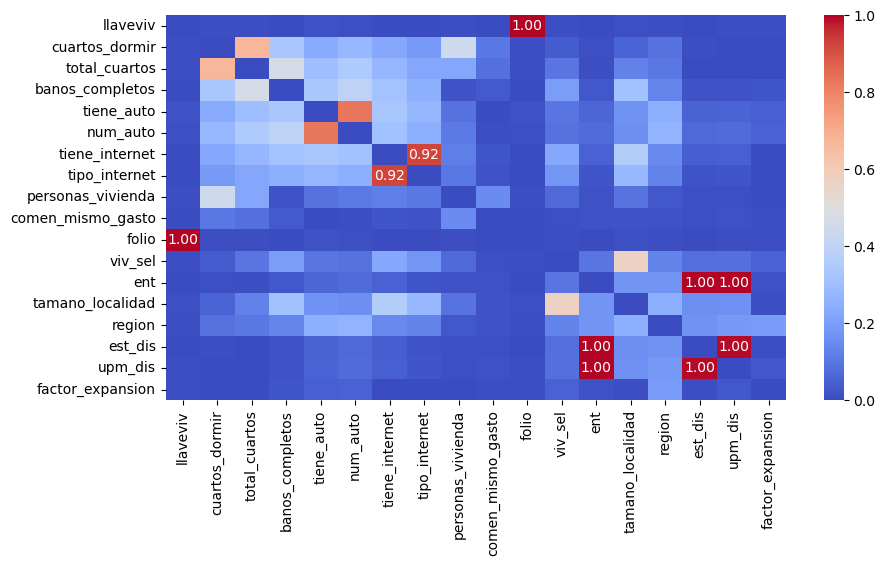

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

%matplotlib inline


cor = df.corr().abs()  
np.fill_diagonal(cor.values, 0)
sns.heatmap(cor, cmap="coolwarm", annot=cor.applymap(lambda x: f"{x:.2f}" if x >= 0.9 else " "), fmt="", cbar=True)
# Obtener los índices (i,j) de la posición del valor máximo
i, j = np.unravel_index(cor.values.argmax(), cor.shape)
y = df.personas_vivienda

corr_matrix = df.corr().abs()
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.9:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            if abs(df[colname1].corr(y)) > abs(df[colname2].corr(y)):
                to_drop.add(colname2)
            else:
                to_drop.add(colname1)
print("Columnas a eliminar por prueba de colinealidad:", to_drop)
df = df.drop(to_drop,axis = 1)

plt.show()

#### 4.2.3 Datos categóricos
Los datos categóricos representan un desafío en la regresión lineal porque los modelos requieren variables numéricas, y las variables categóricas no pueden ser directamente utilizadas en este tipo de modelos. Para resolver este problema, utilizaremos una función llamada dummies, que convierte cada respuesta posible de una variable cualitativa en una columna individual, asignando valores de verdadero o falso (0 o 1). Esto facilita significativamente el modelo, ya que permite hacer predicciones e inferencias más precisas. En esta celda, primero se imprimen las dimensiones del archivo antes y después de separar las variables cuantitativas. La diferencia se dará únicamente en el número de columnas, ya que las variables cualitativas se habrán separado. Este es el último problema que resolveremos, por lo que se imprimirá la base de datos ya corregida.

In [38]:
print("Dimensiones del archivo antes de separar",df.shape)
cols_cualitativas = ["tiene_auto", "tiene_internet", "tamano_localidad", "region", "comen_mismo_gasto", "tamano_localidad","ent"]
for col in cols_cualitativas:
    dummy = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = pd.concat([df, dummy], axis=1)

df = df.drop(columns=cols_cualitativas)
print("Dimensiones del archivo despues de separar:",df.shape)
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

print("\nBase de datos solucionada\n",df.head(7))

Dimensiones del archivo antes de separar (13303, 14)
Dimensiones del archivo despues de separar: (13303, 53)

Base de datos solucionada
    llaveviv  cuartos_dormir  total_cuartos  banos_completos  num_auto  \
0       101               2              4                1       2.0   
1       210               1              3                1       1.0   
2       303               2              4                1       1.0   
3       401               1              4                1       1.0   
4       503               3              6                2       0.0   
5       603               2              4                1       0.0   
6       704               1              3                0       1.0   

   personas_vivienda  viv_sel  factor_expansion  tiene_auto_2  \
0                  3        1               613             0   
1                  1       10              1811             0   
2                  2        3               485             0   
3                 

C:\Users\jesus\AppData\Local\Temp\ipykernel_38824\2446033108.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)


### 4.3 Selección de características
Ahora seleccionaremos las variables o características más relevantes para extraer. Esto se hace porque realizar una regresión lineal múltiple con 53 variables no es lo más adecuado, ya que muchas de estas variables podrían no estar relacionadas con nuestra variable de interés. Por eso, realizamos esta selección de características. En la siguiente celda, separaremos nuestros datos en variables de entrada y salida. Esto es necesario porque, para entrenar un modelo, debemos dividir los datos en dos partes: una para entrenar el modelo y otra para probar su rendimiento. En este caso, utilizaremos el 80% de los datos para entrenar el modelo y el 20% restante para probarlo. Esta proporción se seleccionó debido a la cantidad de datos disponibles en la base.

In [39]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
train, test = train_test_split(df, train_size = 0.8)
X_train = train.drop('personas_vivienda', axis = 1)
X_test = test.drop('personas_vivienda', axis = 1)
Y_train = train.personas_vivienda
Y_test = test.personas_vivienda

La metodología para seleccionar las características se divide en dos enfoques: la selección hacia adelante y la selección hacia atrás. La selección hacia adelante comienza con un modelo vacío y agrega variables una por una, eligiendo aquellas que mejoran el rendimiento del modelo. Por otro lado, la selección hacia atrás empieza con todas las variables y elimina las que menos aportan al modelo. Ambos enfoques tienen sus ventajas, pero la selección mixta es más efectiva, ya que combina lo mejor de ambos métodos, añadiendo variables y eliminando aquellas que no son útiles de forma iterativa. En esta celda se utilizó la selección mixta, además de agregar el parámetro floating, que permite que el modelo elimine o añada variables a medida que avanza, lo que lo hace más flexible. En esta celda también se imprimen las dimensiones de los datos antes, durante y después de la selección, con el fin de observar cómo cambian los datos durante el proceso.

In [40]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import r2_score


print("Dimensiones de los datos antes de hacer la seleccion mixta:", X_train.shape)
print("Nombre de las columnas:", X_train.columns)

est = LinearRegression()

sfs_forward_float = SFS(
    est,
    k_features=(2,8),
    forward=True,
    floating= True,
    scoring="r2",
    cv=10,
).fit(X_train, Y_train)

feat_forward_float = list(sfs_forward_float.k_feature_names_)
print("\nSeleccion hacia adelante:", feat_forward_float)

sfs_backward_float = SFS(
    est,
    k_features=(2, 5),
    forward=False,
    floating= True,
    scoring="r2",
    cv=10,
).fit(X_train, Y_train)

feat_backward_float = list(sfs_backward_float.k_feature_names_)
print("\nSeleccion hacia atras:", feat_backward_float)

X_train_select = X_train[feat_backward_float]
X_test_select = X_test[feat_backward_float]

print("\nDimensiones de los datos despues de hacer la seleccion mixta:", X_train_select.shape)
print("Nombre de las columnas:", X_train_select.columns)

Dimensiones de los datos antes de hacer la seleccion mixta: (10642, 52)
Nombre de las columnas: Index(['llaveviv', 'cuartos_dormir', 'total_cuartos', 'banos_completos',
       'num_auto', 'viv_sel', 'factor_expansion', 'tiene_auto_2',
       'tiene_internet_2', 'tamano_localidad_2', 'tamano_localidad_3',
       'tamano_localidad_4', 'region_2', 'region_3', 'region_4', 'region_5',
       'region_6', 'comen_mismo_gasto_2', 'tamano_localidad_2',
       'tamano_localidad_3', 'tamano_localidad_4', 'ent_2', 'ent_3', 'ent_4',
       'ent_5', 'ent_6', 'ent_7', 'ent_8', 'ent_9', 'ent_10', 'ent_11',
       'ent_12', 'ent_13', 'ent_14', 'ent_15', 'ent_16', 'ent_17', 'ent_18',
       'ent_19', 'ent_20', 'ent_21', 'ent_22', 'ent_23', 'ent_24', 'ent_25',
       'ent_26', 'ent_27', 'ent_28', 'ent_29', 'ent_30', 'ent_31', 'ent_32'],
      dtype='object')

Seleccion hacia adelante: ['cuartos_dormir', 'total_cuartos', 'banos_completos', 'viv_sel', 'tiene_internet_2', 'tamano_localidad_4', 'region_6', 'c

Al realizar esta selección de características, eliminamos 48 variables que no eran tan significativas, quedándonos con 5 variables clave. Esto mejora la eficiencia y la interpretación del modelo, ya que trabajamos con un conjunto más reducido y relevante de variables. Al enfocarnos en las variables que realmente tienen un impacto en la variable de interés, logramos un modelo más preciso y manejable, lo que facilita tanto las predicciones como la toma de decisiones basadas en los resultados.

### 4.4 Regresión lineal y no lineal
#### 4.4.1 Regresión lineal
Ahora comenzaremos a entrenar nuestro modelo utilizando regresión lineal múltiple. La regresión lineal múltiple es un método estadístico que permite predecir el valor de una variable dependiente a partir de varias variables independientes. Es especialmente útil cuando trabajamos con muchas variables, ya que nos permite analizar cómo cada una de ellas influye en el resultado de manera simultánea. En esta celda, se imprime un resumen del modelo de regresión lineal múltiple y se genera una gráfica de predicciones frente a los valores reales. Esta gráfica nos ayudará a evaluar la calidad del modelo y a visualizarlos de manera más clara. 

In [41]:
import statsmodels.api as sm
%matplotlib inline

model = sm.OLS(Y_train,sm.add_constant(X_train_select))
results = model.fit()
print(results.summary())
print("p-values individuales:\n",results.pvalues)

                            OLS Regression Results                            
Dep. Variable:      personas_vivienda   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     649.0
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        05:13:24   Log-Likelihood:                -19516.
No. Observations:               10642   AIC:                         3.904e+04
Df Residuals:                   10636   BIC:                         3.909e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.8848    

Los parámetros que nos ayudan a entender las asociaciones de las variables con el modelo son la probabilidad del estadístico F y los valores p individuales. Un estadístico F bajo indica que al menos una de las variables es altamente significativa. En este caso, efectivamente, la variable *número de cuartos para dormir* tiene un valor p muy bajo, lo que confirma su fuerte asociación con la variable de interés. Además, se observa que los valores p de los estadísticos t individuales son significativamente menores a 0.05, lo que sugiere que estas variables están bien asociadas con la variable de interés.

Los coeficientes estimados indican lo siguiente:

* *cuartos\_dormir*: por cada cuarto adicional, aumenta un promedio de 0.9034 personas por vivienda.
* *banos\_completos*: por cada baño completo adicional, disminuye un promedio de 0.3582 personas por vivienda.
* *tiene\_internet\_2*: por cada vivienda adicional con internet móvil, disminuye un promedio de 0.3039 personas por vivienda.
* *tamano\_localidad\_4*: por cada vivienda en una localidad de tamaño 4, aumenta un promedio de 0.1891 personas por vivienda.
* *comen\_mismo\_gasto\_2*: por cada vivienda que no comparte el mismo gasto en alimentación, aumenta un promedio de 1.7116 personas por vivienda.
  

#### 4.4.2 Regresión no lineal
Al observar la configuración de los datos, decidimos utilizar el modelo no lineal KNN (K-Nearest Neighbors). Este modelo se basa en la idea de que las observaciones similares estarán cerca unas de otras en el espacio de características. El modelo KNN clasifica una nueva observación basándose en las clases de sus k vecinos más cercanos. Es especialmente útil cuando las relaciones entre las variables no son lineales como en este caso.

Para aplicar el modelo KNN, es necesario escalar las variables. Esto se debe a que el algoritmo KNN se basa en distancias entre puntos en el espacio de características, y si las variables tienen escalas muy diferentes (por ejemplo, una variable en metros y otra en kilómetros), las distancias no se calcularán correctamente. Escalar las variables asegura que todas las características tengan la misma importancia en el cálculo de distancias, lo que mejora la precisión del modelo.

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_select)
X_test_scaled = scaler.transform(X_test_select)

# Instanciar el modelo KNN para regresión
knn_reg = KNeighborsRegressor(n_neighbors=10)

# Ajustar el modelo
knn_reg.fit(X_train_scaled, Y_train)


KNeighborsRegressor(n_neighbors=10)

### 4.5 Errores de modelos
Para evaluar la calidad y los errores de nuestros modelos, se imprimen el RSE y el $R^2$. El RSE indica qué tan bien se ajustan los datos al modelo, un valor bajo sugiere que el modelo tiene un buen ajuste. Por otro lado, el $R^2$ mide la proporción de la variabilidad de la variable dependiente que es explicada por las variables independientes en el modelo, un valor cercano a 1 indica un ajuste excelente, mientras que un valor cercano a 0 sugiere que el modelo no explica bien los datos.

Ambos valores se calcularán para los dos modelos y se compararán. Además, se graficarán las predicciones de los modelos contra los valores reales para observar visualmente su comportamiento y evaluar cómo se ajustan los modelos a los datos.

RSE de prueba en modelo de regresion lineal multiple: 1.5147388846239471
R^2 de prueba en modelo de regresion lineal multiple: 0.23378198670058548

RSE del modelo no lineal KNN: 1.5718182311171682
R^2 del modelo no lineal KNN: 0.1831310579197598


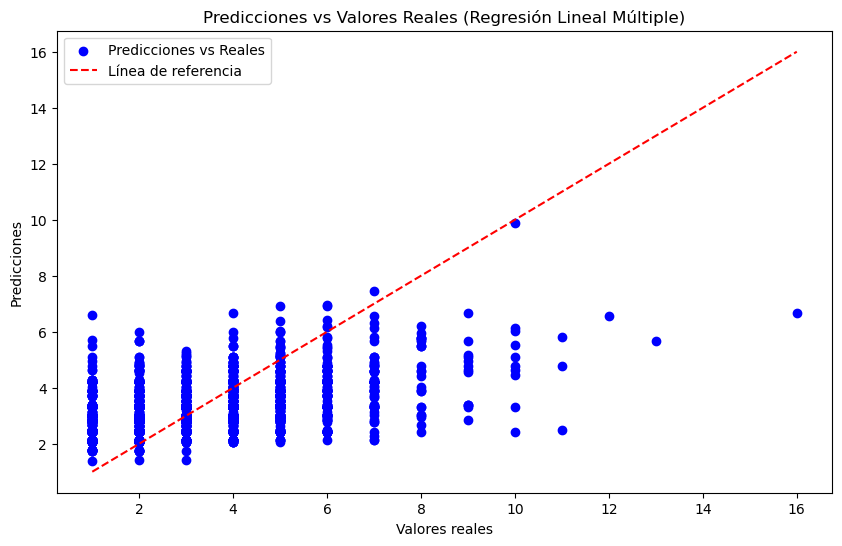

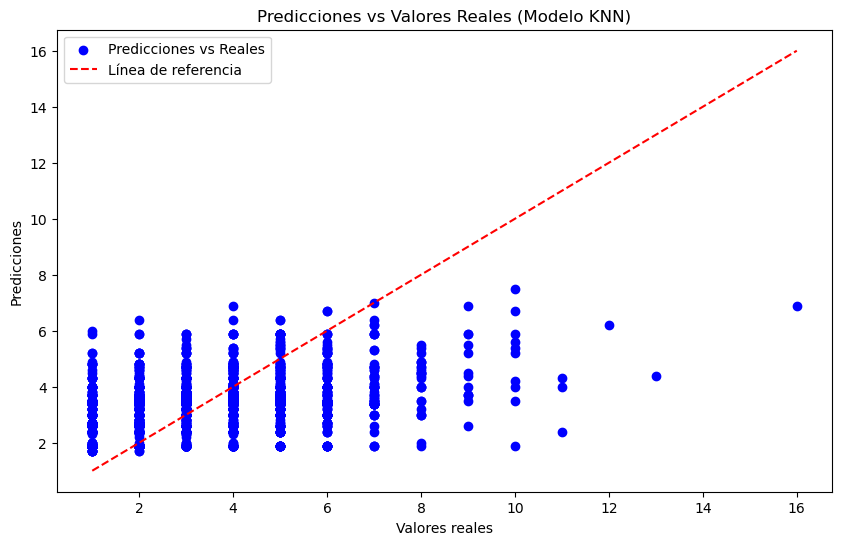

In [44]:
from sklearn.metrics import mean_squared_error

print("RSE de prueba en modelo de regresion lineal multiple:",np.sqrt(results.mse_resid))
print("R^2 de prueba en modelo de regresion lineal multiple:", results.rsquared)

y_pred = knn_reg.predict(X_test_scaled)
r2 = knn_reg.score(X_test_scaled, Y_test)
rse = np.sqrt(mean_squared_error(Y_test, y_pred))
print("\nRSE del modelo no lineal KNN:", rse)
print("R^2 del modelo no lineal KNN:", r2)

y_pred_lin = results.predict(sm.add_constant(X_test_select))

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred_lin, color='blue', label='Predicciones vs Reales')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Línea de referencia')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (Regresión Lineal Múltiple)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, color='blue', label='Predicciones vs Reales')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Línea de referencia')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (Modelo KNN)')
plt.legend()
plt.show()


Ambos modelos presentan un valor de $R^2$ bastante bajo, lo que indica que la calidad de los modelos no es óptima. Esto puede deberse a que las variables de entrada en la base de datos no tienen la variabilidad de la variable de interés. Una posible solución es realizar otro estudio con variables adicionales, manteniendo las que ya se han utilizado, ya que son significativas. Un valor bajo de $R^2$ no significa que el modelo sea incorrecto, sino que no tiene datos suficientes, ya que hemos identificado variables que describen bien la salida, pero aún faltan más variables.

Al comparar los dos modelos, el modelo de regresión lineal múltiple es superior, ya que tiene un $R^2$ más alto y un RSE menor que el modelo KNN.

### 4.6 Modelo de inferencia
Ahora crearemos un modelo de inferencia utilizando la regresión lineal múltiple. Un modelo de inferencia se utiliza para entender las relaciones entre las variables en un conjunto de datos y hacer afirmaciones sobre cómo una o más variables independientes afectan a la variable dependiente, sin necesariamente predecir valores futuros. En lugar de enfocarnos en la predicción, el objetivo de un modelo de inferencia es identificar la significancia estadística de las variables y sus efectos en el modelo.

Para este modelo, utilizaremos todos los datos disponibles en la base. Posteriormente, se imprimirán todos los datos relevantes para construir la inferencia, como los coeficientes de las variables, los valores p, el estadístico F y otras métricas clave que nos permitirán analizar las relaciones y significancia de las variables.

                            OLS Regression Results                            
Dep. Variable:      personas_vivienda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     102.4
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        05:44:50   Log-Likelihood:                -24237.
No. Observations:               13303   AIC:                         4.856e+04
Df Residuals:                   13258   BIC:                         4.890e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.6172    

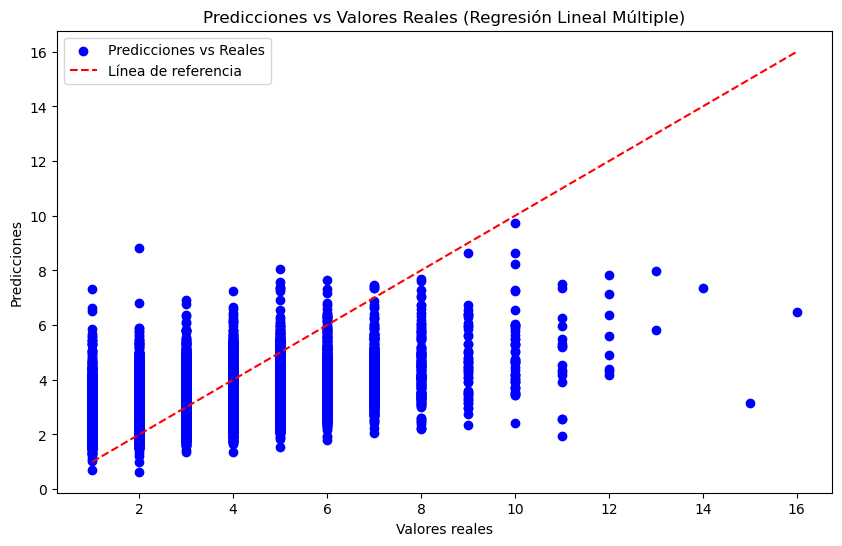

In [52]:
X = df.drop("personas_vivienda", axis=1)
Y = df["personas_vivienda"]

model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()
print(results.summary())
p_values = results.pvalues
print("\nVariables que cumplen con el p-value menor a 0.05:")
for i, p_value in enumerate(p_values):
    if p_value <= 0.05:
        print(X_const.columns[i])

conf_int = results.conf_int(alpha=0.05)  # Intervalo de confianza del 95%
print("\nIntervalos de confianza de los coeficientes:")
print(conf_int)

y_pred = results.predict(sm.add_constant(X))
predictions = results.get_prediction(sm.add_constant(X))
prediction_summary = predictions.summary_frame(alpha=0.05)  # Intervalo de confianza del 95%
print("\nResumen de predicciones con intervalos de confianza:")
print(prediction_summary.head())
plt.figure(figsize=(10, 6))
plt.scatter(Y, y_pred, color='blue', label='Predicciones vs Reales')
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], color='red', linestyle='--', label='Línea de referencia')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (Regresión Lineal Múltiple)')
plt.legend()
plt.show()

#### 4.6.1 Inferencias
1. Con un 95% de confianza, se puede decir que el coeficiente de la variable "llaveviv" está entre $-9.838951\times10^8$ y $9.410828\times10^8$. Como el intervalo incluye el valor cero, podemos inferir que "llaveviv" no tiene un efecto significativo sobre la variable dependiente.
2. Con un 95% de confianza, se puede decir que el coeficiente de "banos_completos" está entre $2.181599\times10^8$ y $3.534971\times10^8$. Este intervalo no incluye el valor cero, por lo que podemos inferir que el número de baños completos tiene un impacto significativo sobre la variable dependiente.
3. Con un p-value menor a 0.05, podemos inferir que la cantidad de cuartos a dormir tiene una relación significativa con la variable dependiente de interés.

## Referencias


1. Instituto Nacional de Estadística y Geografía (INEGI). (s. f.). Descarga masiva. Recuperado el 14 de agosto de 2025, de https://www.inegi.org.mx/app/descarga/ficha.html?tit=2534415&ag=0&f=csv

Se uso la IA para mejor desempeño en redacción. ChatGPT (ChatGPT 5). OpenAI. Acceso: Agosto 14,2025. [Online]. Disponible en https://chatgpt.com/